In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv('train.csv')
data.head()
test_sub = pd.read_csv('test.csv')


## Splitting the data to test and train


In [97]:
train, test = train_test_split(data, test_size=0.2, random_state=42)


## Gain some info about the data


In [98]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 331 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        159 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [99]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,572.000000,712.000000,712.000000,712.000000
mean,448.234551,0.376404,2.330056,29.498846,0.553371,0.379213,32.586276
std,256.731423,0.484824,0.824584,14.500059,1.176404,0.791669,51.969529
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.925000
50%,453.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,673.500000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Will be dropping cabin, ticket id and name features


In [100]:
columns_to_drop = ['Cabin', 'Name', 'PassengerId', 'Ticket']
titanic_data = train.drop(columns=columns_to_drop).copy()
titanic_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,1,male,45.5,0,0,28.5000,S
733,0,2,male,23.0,0,0,13.0000,S
382,0,3,male,32.0,0,0,7.9250,S
704,0,3,male,26.0,1,0,7.8542,S
813,0,3,female,6.0,4,2,31.2750,S


## Dropping two rows where embarked feature is null


In [101]:
titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  710 non-null    int64  
 1   Pclass    710 non-null    int64  
 2   Sex       710 non-null    object 
 3   Age       570 non-null    float64
 4   SibSp     710 non-null    int64  
 5   Parch     710 non-null    int64  
 6   Fare      710 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


In [102]:
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  710 non-null    int64  
 1   Pclass    710 non-null    int64  
 2   Sex       710 non-null    object 
 3   Age       570 non-null    float64
 4   SibSp     710 non-null    int64  
 5   Parch     710 non-null    int64  
 6   Fare      710 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


## Replace the missing values


In [103]:
median_age = titanic_data['Age'].median()

titanic_data['Age'].fillna(median_age, inplace=True)
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 331 to 102
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  710 non-null    int64  
 1   Pclass    710 non-null    int64  
 2   Sex       710 non-null    object 
 3   Age       710 non-null    float64
 4   SibSp     710 non-null    int64  
 5   Parch     710 non-null    int64  
 6   Fare      710 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.9+ KB


In [104]:

titanic_data_encoded = pd.get_dummies(
    titanic_data, columns=['Sex', 'Embarked'])

titanic_data_encoded


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,0,1,45.5,0,0,28.5000,0,1,0,0,1
733,0,2,23.0,0,0,13.0000,0,1,0,0,1
382,0,3,32.0,0,0,7.9250,0,1,0,0,1
704,0,3,26.0,1,0,7.8542,0,1,0,0,1
813,0,3,6.0,4,2,31.2750,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,1,3,21.0,0,0,7.6500,1,0,0,0,1
270,0,1,28.0,0,0,31.0000,0,1,0,0,1
860,0,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,1,14.0,1,2,120.0000,1,0,0,0,1


In [105]:
from sklearn.preprocessing import StandardScaler


# Select the numerical features you want to standardize
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch',
                      'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Perform standardization on the selected features
titanic_data_encoded[numerical_features] = scaler.fit_transform(
    titanic_data_encoded[numerical_features])


In [106]:
correlation = titanic_data_encoded.corr()['Survived']
correlation


Survived      1.000000
Pclass       -0.317806
Age          -0.054779
SibSp        -0.046017
Parch         0.080262
Fare          0.244187
Sex_female    0.539452
Sex_male     -0.539452
Embarked_C    0.161731
Embarked_Q   -0.005010
Embarked_S   -0.137159
Name: Survived, dtype: float64

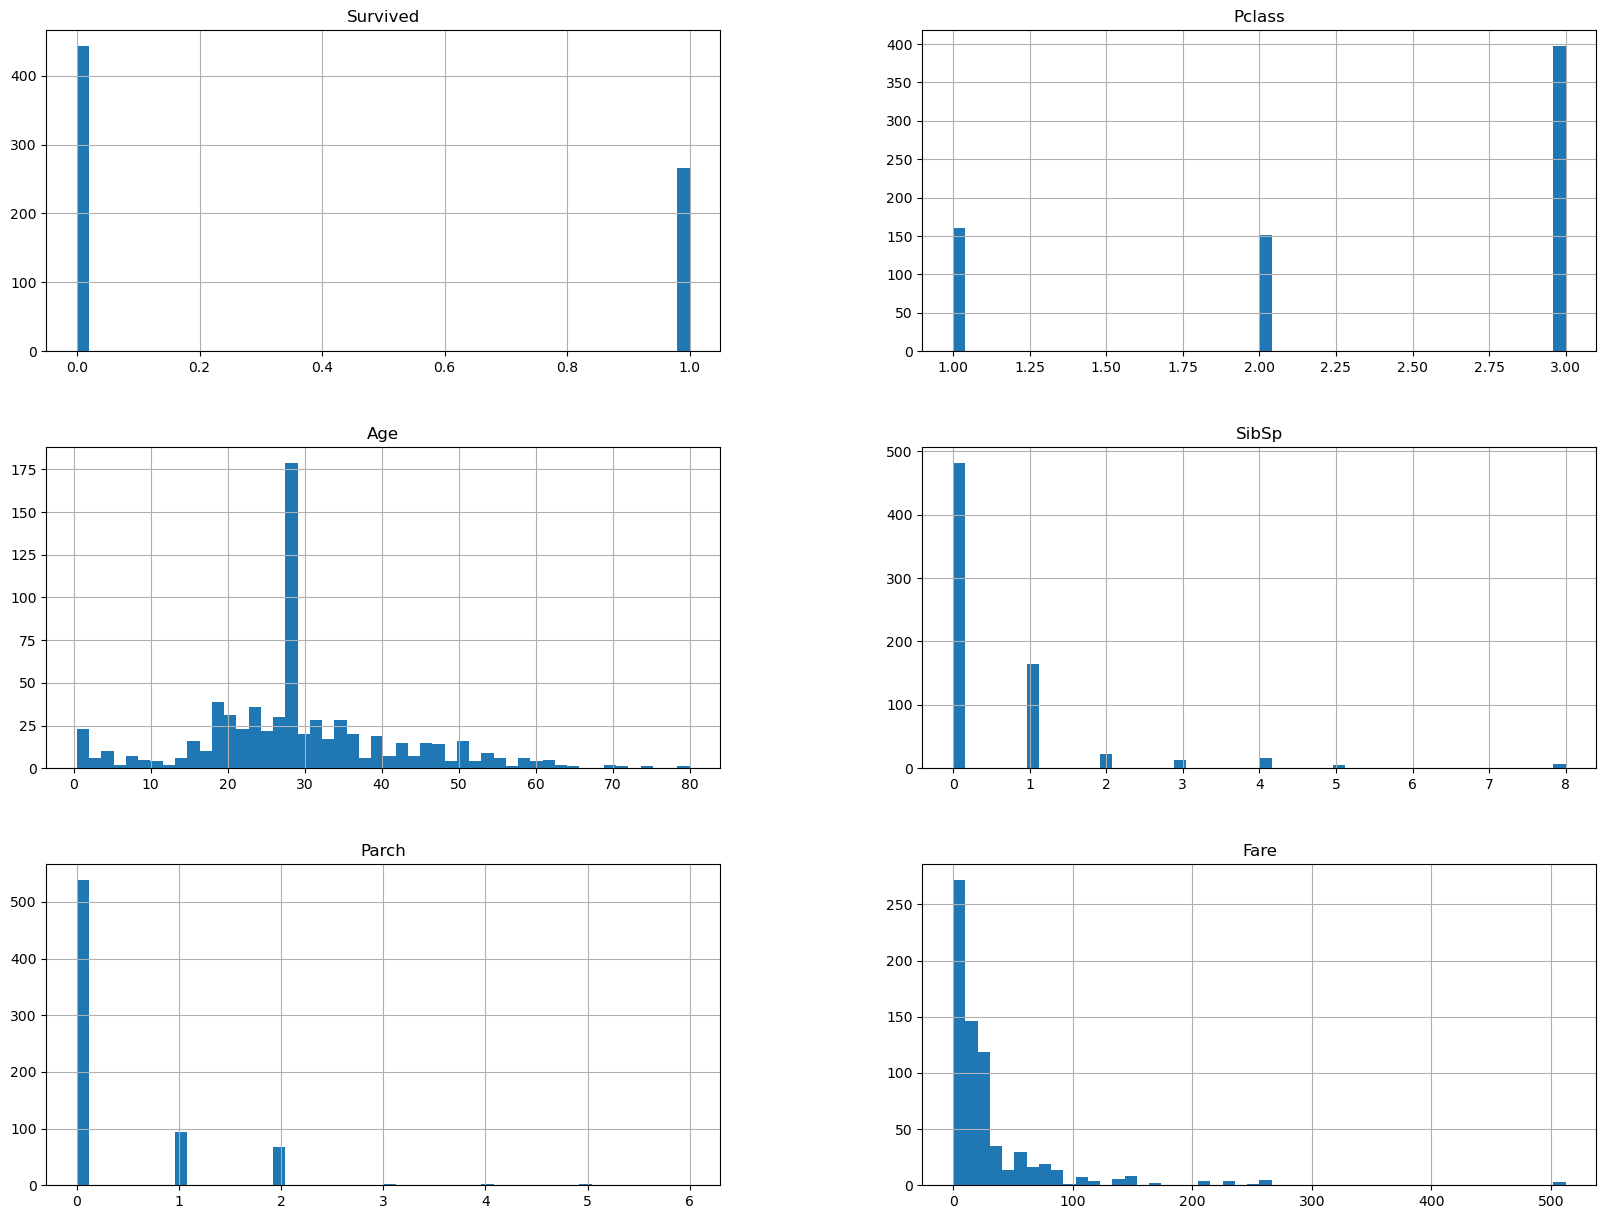

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

titanic_data.hist(bins=50, figsize=(20, 15))
plt.show()


In [108]:


# split the data
X_train = titanic_data_encoded.drop('Survived', axis=1)
y_train = titanic_data_encoded['Survived']


columns_to_drop = ['Cabin', 'Name', 'PassengerId', 'Ticket']
test_data = test.drop(columns=columns_to_drop).copy()
test_data.dropna(subset=['Embarked'], inplace=True)
median_age = test_data['Age'].median()

test_data['Age'].fillna(median_age, inplace=True)

test_data_encoded = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])


test_data_encoded


# Select the numerical features you want to standardize
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch',
                      'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Perform standardization on the selected features
test_data_encoded[numerical_features] = scaler.fit_transform(
    test_data_encoded[numerical_features])

X_test = test_data_encoded.drop('Survived', axis=1)
y_test = test_data_encoded['Survived']


## Train the model


In [134]:
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression*
# from sklearn.model_selection import RandomizedSearchCV


# model = LogisticRegression()
# model.fit(X_train,y_train)
# # Define the parameter grid for randomized search
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga'],
#     'max_iter': [100, 200, 500]
# }

# # Create an instance of RandomizedSearchCV
# random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=42)

# # Fit the model using randomized search cross-validation
# random_search.fit(X_train, y_train)

# # Get the best parameters and best score
# best_params = random_search.best_params_
# best_score = random_search.best_score_

# # Print the best parameters and best score
# print("Best Parameters:", best_params)
# print("Best Score:", best_score)

# # Use the best model to make predictions on the test set
# best_model = random_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # Calculate the accuracy of the best model on the test set
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Accuracy:", accuracy)


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

# Define the parameter grid for randomized search
param_grid = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    model, param_grid, n_iter=10, cv=5, random_state=42)

# Fit the model using randomized search cross-validation
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to make predictions on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


/home/abdallah/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/abdallah/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/abdallah/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'entropy'}
Best Score: 0.8295774647887324
Test Accuracy: 0.8100558659217877


## Now we predict on the test set to submit


In [135]:

columns_to_drop = ['Cabin', 'Name', 'Ticket']
titanic_test = test_sub.drop(columns=columns_to_drop).copy()

titanic_test.dropna(subset=['Embarked'], inplace=True)
median_age = titanic_test['Age'].median()
median_fare = titanic_test['Fare'].median()
titanic_test['Age'].fillna(median_age, inplace=True)
titanic_test['Fare'].fillna(median_fare, inplace=True)

titanic_test_encoded = pd.get_dummies(
    titanic_test, columns=['Sex', 'Embarked'])

# Select the numerical features you want to standardize
numerical_features = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch',
                      'Sex_male', 'Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Perform standardization on the selected features
titanic_test_encoded[numerical_features] = scaler.fit_transform(
    titanic_test_encoded[numerical_features])
titanic_test_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    float64
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    float64
 4   Parch        418 non-null    float64
 5   Fare         418 non-null    float64
 6   Sex_female   418 non-null    float64
 7   Sex_male     418 non-null    float64
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 36.0 KB


In [136]:
test_ids = titanic_test_encoded['PassengerId']
titanic_test_encoded.drop(columns='PassengerId', inplace=True)
submission_preds = random_search.predict(titanic_test_encoded)
df = pd.DataFrame({'PassengerId': test_ids.values,
                   'Survived': submission_preds,
                   })


In [137]:
df.to_csv('submission.csv', index=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
